# Análise geral de correlação entre doenças respiratórias, intoxicações e a qualidade do ar dos municípios brasileiros

### Instalação e Importação das bibliotecas:


In [26]:
%pip install numpy
import numpy as np

%pip install pandas
import pandas as pd

%pip install matplotlib
import matplotlib.pyplot as plt

%pip install scikit-learn
import sklearn as sk

%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\grpas\appdata\local\programs\python\python311\lib\site-packages (2.2.2)




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Carregamento dos dados:

In [27]:
asma =          pd.read_csv('./normalizado/asma_2006-2023.csv',sep=';').drop_duplicates()
estacoes =      pd.read_csv('./normalizado/estacoes_ar_2022.csv',sep=';').drop_duplicates()
influenza =     pd.read_csv('./normalizado/influenza_2009-2010.csv',sep=';').drop_duplicates()
municipios =    pd.read_csv('./normalizado/municipios.csv',sep=';').drop_duplicates()
intoxicacoes =  pd.read_csv('./normalizado/intoxicacoes_2013-2023.csv',sep=';').drop_duplicates()
pneumo =        pd.read_csv('./normalizado/pneumoconioses_2006-2023.csv',sep=';').drop_duplicates()
populacao =     pd.read_csv('./normalizado/populacao_2022.csv',sep=';').drop_duplicates()
meningite =     pd.read_csv('./normalizado/meningite_2007-2023.csv',sep=';').drop_duplicates()
qualidade_ar =  pd.read_csv('./normalizado/qualidade_ar_2022.csv',sep=';').drop_duplicates()

## Tratamento dos dados

### Eliminação de duplicatas para consistência:
Foi feita a conferência dos dados antes do carregamento, mas por via das dúvidas, eliminamos duplicatas aqui.

In [28]:
asma =          asma.drop_duplicates()
estacoes =      estacoes.drop_duplicates()
influenza =     influenza.drop_duplicates()
municipios =    municipios.drop_duplicates()
intoxicacoes =  intoxicacoes.drop_duplicates()
pneumo =        pneumo.drop_duplicates()
populacao =     populacao.drop_duplicates()
meningite =     meningite.drop_duplicates()
qualidade_ar =  qualidade_ar.drop_duplicates()

### Eliminação de colunas sem medidas na tabela de qualidade do ar:
A tabela de qualidade do ar foi completamente reorganizada:
- Cada linha representa agora um conjunto de medições de uma determinada estação, no lugar de uma única medição pontual.
- Foi criada uma coluna para cada item medido (dentre os disponibilizados pela fonte)
- *(ITEM)_MED* representa o valor médio para todas as medições de um determinado *ITEM*, para análises mais gerais
- *(ITEM)_DP* representa o desvio padrão da média anterior, para análises mais aprofundadas

Ainda assim, existem itens para os quais não houve a disponibilização de nenhum dado pela fonte, resultando em colunas inteiras de nulos. Portanto, descartaremos essas colunas.


In [29]:
qualidade_ar = qualidade_ar.dropna(axis=1,how='all')
qualidade_ar


,NOME_ESTACAO,NOME_MUNIC,UF,CH_MED,CH_DP,CH4_MED,CH4_DP,CO_MED,CO_DP,DV_MED,...,SO2_MED,SO2_DP,TEMP_MED,TEMP_DP,U_MED,U_DP,UR_MED,UR_DP,VV_MED,VV_DP
0,BARRA LONGA CENTRO,BARRA LONGA,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COMUNIDADE DO FEIJÃO,BRUMADINHO,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GESTEIRA,BARRA LONGA,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MATRIZ,CONGONHAS,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MOTAS,OURO PRETO,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,TABOÃO DA SERRA,TABOÃO DA SERRA,SP,NaN,NaN,NaN,NaN,4.376070,3.185780,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,TATUÍ,TATUÍ,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,TAUBATÉ,TAUBATÉ,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,TIJUCA,RIO DE JANEIRO,RJ,107.103,217.385,NaN,NaN,0.851778,14.705300,205.818,...,-9.999,3.552710e-15,28.1135,5.58052,NaN,NaN,64.6862,20.9263,0.153705,0.101019


### Checando a quantidade de estações que mediram cada item:

Foram escolhidos os 7 itens com mais pontos de medição para a análise

In [30]:
medicoes_disponiveis = qualidade_ar.count().sort_values(ascending=False)
medicoes_disponiveis

NOME_ESTACAO    153
NOME_MUNIC      153
UF              153
IQAR_DP         150
IQAR_MED        150
MP10_DP         129
MP10_MED        129
O3_MED           81
O3_DP            81
MP2.5_DP         77
MP2.5_MED        77
NO2_MED          60
NO2_DP           60
CO_DP            47
CO_MED           47
SO2_MED          41
SO2_DP           41
PTS_DP           32
PTS_MED          32
DV_MED           18
DV_DP            18
VV_MED           18
VV_DP            18
NO_DP            15
NO_MED           15
NOX_MED          15
NOX_DP           15
TEMP_MED         13
TEMP_DP          13
PRESS_MED        13
PRESS_DP         13
RAD_MED          12
RAD_DP           12
CH_MED           10
CH_DP            10
UR_DP            10
UR_MED           10
ERT_MED           6
ERT_DP            6
U_DP              4
U_MED             4
CH4_DP            3
CH4_MED           3
HCT_MED           3
HCT_DP            3
NH3_MED           3
NH3_DP            3
HCNM_DP           1
HCNM_MED          1
H2S_MED           1


### Criação de tabelas com taxas de incidência relativas à população

In [31]:
aux = pd.merge(populacao,asma)
aux['%ASMA'] = aux['NOTIFICACOES'] / aux['POP']
inc_asma = aux[['COD_MUNIC','%ASMA']]

inc_asma

,COD_MUNIC,%ASMA
0,110004,0.000081
1,110012,0.000015
2,110018,0.000081
3,110020,0.000024
4,110030,0.000029
...,...,...
849,521810,0.000248
850,521900,0.000131
851,521945,0.000297
852,522157,0.000353


In [32]:
aux = pd.merge(populacao,influenza)
aux['%INFL'] = aux['NOTIFICACOES'] / aux['POP']
inc_influenza = aux[['COD_MUNIC','%INFL']]

inc_influenza

,COD_MUNIC,%INFL
0,110010,0.000085
1,110020,0.000077
2,120010,0.000184
3,120020,0.000011
4,120040,0.000257
...,...,...
1304,522140,0.000008
1305,522155,0.000184
1306,522185,0.000006
1307,522200,0.000497


In [33]:
aux = pd.merge(populacao,meningite)
aux['%MENIN'] = aux['NOTIFICACOES'] / aux['POP']
inc_meningite = aux[['COD_MUNIC','%MENIN']]

inc_meningite

,COD_MUNIC,%MENIN
0,110001,0.000133
1,110002,0.000072
2,110004,0.003090
3,110005,0.000124
4,110006,0.000066
...,...,...
2548,522160,0.000170
2549,522170,0.000072
2550,522185,0.000023
2551,522190,0.000520


In [34]:
aux = pd.merge(populacao,pneumo)
aux['%PNEU'] = aux['NOTIFICACOES'] / aux['POP']
inc_pneu = aux[['COD_MUNIC','%PNEU']]

inc_pneu

,COD_MUNIC,%PNEU
0,110004,0.000023
1,110005,0.000062
2,110020,0.000002
3,110029,0.000168
4,110148,0.000202
...,...,...
358,521690,0.001405
359,521730,0.000119
360,521970,0.000119
361,522020,0.000046


In [35]:
aux = pd.merge(populacao,intoxicacoes)

aux['%INTOX_AGR_A'] = aux['AGROTOXICO_AGRICOLA'] / aux['POP']
aux['%INTOX_AGR_D'] = aux['AGROTOXICO_DOMESTICO'] / aux['POP']
aux['%INTOX_AGR_SP'] = aux['AGROTOXICO_SAUDE_PUBLICA'] / aux['POP']

aux['%INTOX_PROD_QUI'] = aux['PROD_QUIMICO'] / aux['POP']

aux['%INTOX_RATICIDA'] = aux['RATICIDA'] / aux['POP']

aux['%INTOX_MET'] = aux['METAL'] / aux['POP']

aux['%INTOX_GERAL'] = (     aux['AGROTOXICO_AGRICOLA'] 
                       +    aux['AGROTOXICO_DOMESTICO']
                       +    aux['AGROTOXICO_SAUDE_PUBLICA']
                       +    aux['PROD_QUIMICO']
                       +    aux['RATICIDA']
                       +    aux['METAL']
) / aux['POP']

inc_intox = aux[['COD_MUNIC','%INTOX_AGR_A','%INTOX_AGR_D','%INTOX_AGR_SP','%INTOX_PROD_QUI','%INTOX_RATICIDA','%INTOX_MET','%INTOX_GERAL']]

inc_intox

,COD_MUNIC,%INTOX_AGR_A,%INTOX_AGR_D,%INTOX_AGR_SP,%INTOX_PROD_QUI,%INTOX_RATICIDA,%INTOX_MET,%INTOX_GERAL
0,110001,0.004841,0.000711,0.000133,0.000489,0.000977,NaN,NaN
1,110002,0.000396,0.000288,0.000009,0.000270,0.000612,0.000018,0.001592
2,110003,0.000592,NaN,NaN,NaN,0.000197,NaN,NaN
3,110004,0.001111,0.000185,0.000023,0.000255,0.000417,NaN,NaN
4,110005,0.000808,0.000062,NaN,0.000186,0.000435,NaN,NaN
...,...,...,...,...,...,...,...,...
5155,522200,0.002058,0.000426,0.000284,0.000426,0.000923,NaN,NaN
5156,522205,0.001777,NaN,NaN,NaN,0.000444,NaN,NaN
5157,522220,0.001085,0.000620,NaN,0.001085,0.000465,NaN,NaN
5158,522230,0.001852,NaN,NaN,0.000337,0.000337,NaN,NaN


### Criação da tabela de análise

In [36]:
tabela_de_analise = pd.merge(estacoes,qualidade_ar)
tabela_de_analise = pd.merge(tabela_de_analise,populacao)

tabela_de_analise = pd.merge(tabela_de_analise,inc_asma,how='left')
tabela_de_analise = pd.merge(tabela_de_analise,inc_influenza,how='left')
tabela_de_analise = pd.merge(tabela_de_analise,inc_meningite,how='left')
tabela_de_analise = pd.merge(tabela_de_analise,inc_pneu,how='left')

tabela_de_analise = pd.merge(tabela_de_analise,inc_intox,how='left')

tabela_de_analise


,ID_ESTACAO,NOME_ESTACAO,COD_MUNIC,NOME_MUNIC,UF,CH_MED,CH_DP,CH4_MED,CH4_DP,CO_MED,...,%INFL,%MENIN,%PNEU,%INTOX_AGR_A,%INTOX_AGR_D,%INTOX_AGR_SP,%INTOX_PROD_QUI,%INTOX_RATICIDA,%INTOX_MET,%INTOX_GERAL
0,182,AREIAS,290570,CAMAÇARI,BA,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000171,0.00001,0.000013,0.000042,0.000026,0.000165,0.000285,0.000042,0.000572
1,184,MACHADINHO,290570,CAMAÇARI,BA,0.031187,0.505189,NaN,NaN,0.205316,...,NaN,0.000171,0.00001,0.000013,0.000042,0.000026,0.000165,0.000285,0.000042,0.000572
2,185,CÂMARA,290570,CAMAÇARI,BA,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000171,0.00001,0.000013,0.000042,0.000026,0.000165,0.000285,0.000042,0.000572
3,187,GRAVATÁ,290570,CAMAÇARI,BA,0.033710,0.229848,1.55587,0.498885,0.256050,...,NaN,0.000171,0.00001,0.000013,0.000042,0.000026,0.000165,0.000285,0.000042,0.000572
4,181,ESCOLA,291005,DIAS D'ÁVILA,BA,0.042750,0.238797,NaN,NaN,NaN,...,NaN,0.000084,NaN,NaN,0.000048,0.000024,0.000119,0.000251,0.000012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,43781,RIO GRANDE/MOVEL,431560,RIO GRANDE,RS,NaN,NaN,NaN,NaN,1.710450,...,0.000230,0.000334,NaN,0.000056,0.000117,NaN,0.000174,0.000103,0.000014,NaN
151,44,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,432200,TRIUNFO,RS,NaN,NaN,NaN,NaN,0.059959,...,0.000199,0.000431,NaN,0.000166,NaN,NaN,0.000099,0.000066,0.000033,NaN
152,341,ESTAÇÃO DE MONITORAMENTO - ELDORADO BRASIL CEL...,500830,TRÊS LAGOAS,MS,0.224999,1.947290,NaN,NaN,0.335263,...,0.000080,0.000519,NaN,0.000208,0.000551,0.000152,0.000352,0.000855,0.000008,0.002126
153,24521,ESTAÇÃO METEREOLÓGICA E QUALIDADE DO AR - PETR...,500830,TRÊS LAGOAS,MS,NaN,NaN,NaN,NaN,0.226822,...,0.000080,0.000519,NaN,0.000208,0.000551,0.000152,0.000352,0.000855,0.000008,0.002126


## Análise por matriz de correlação

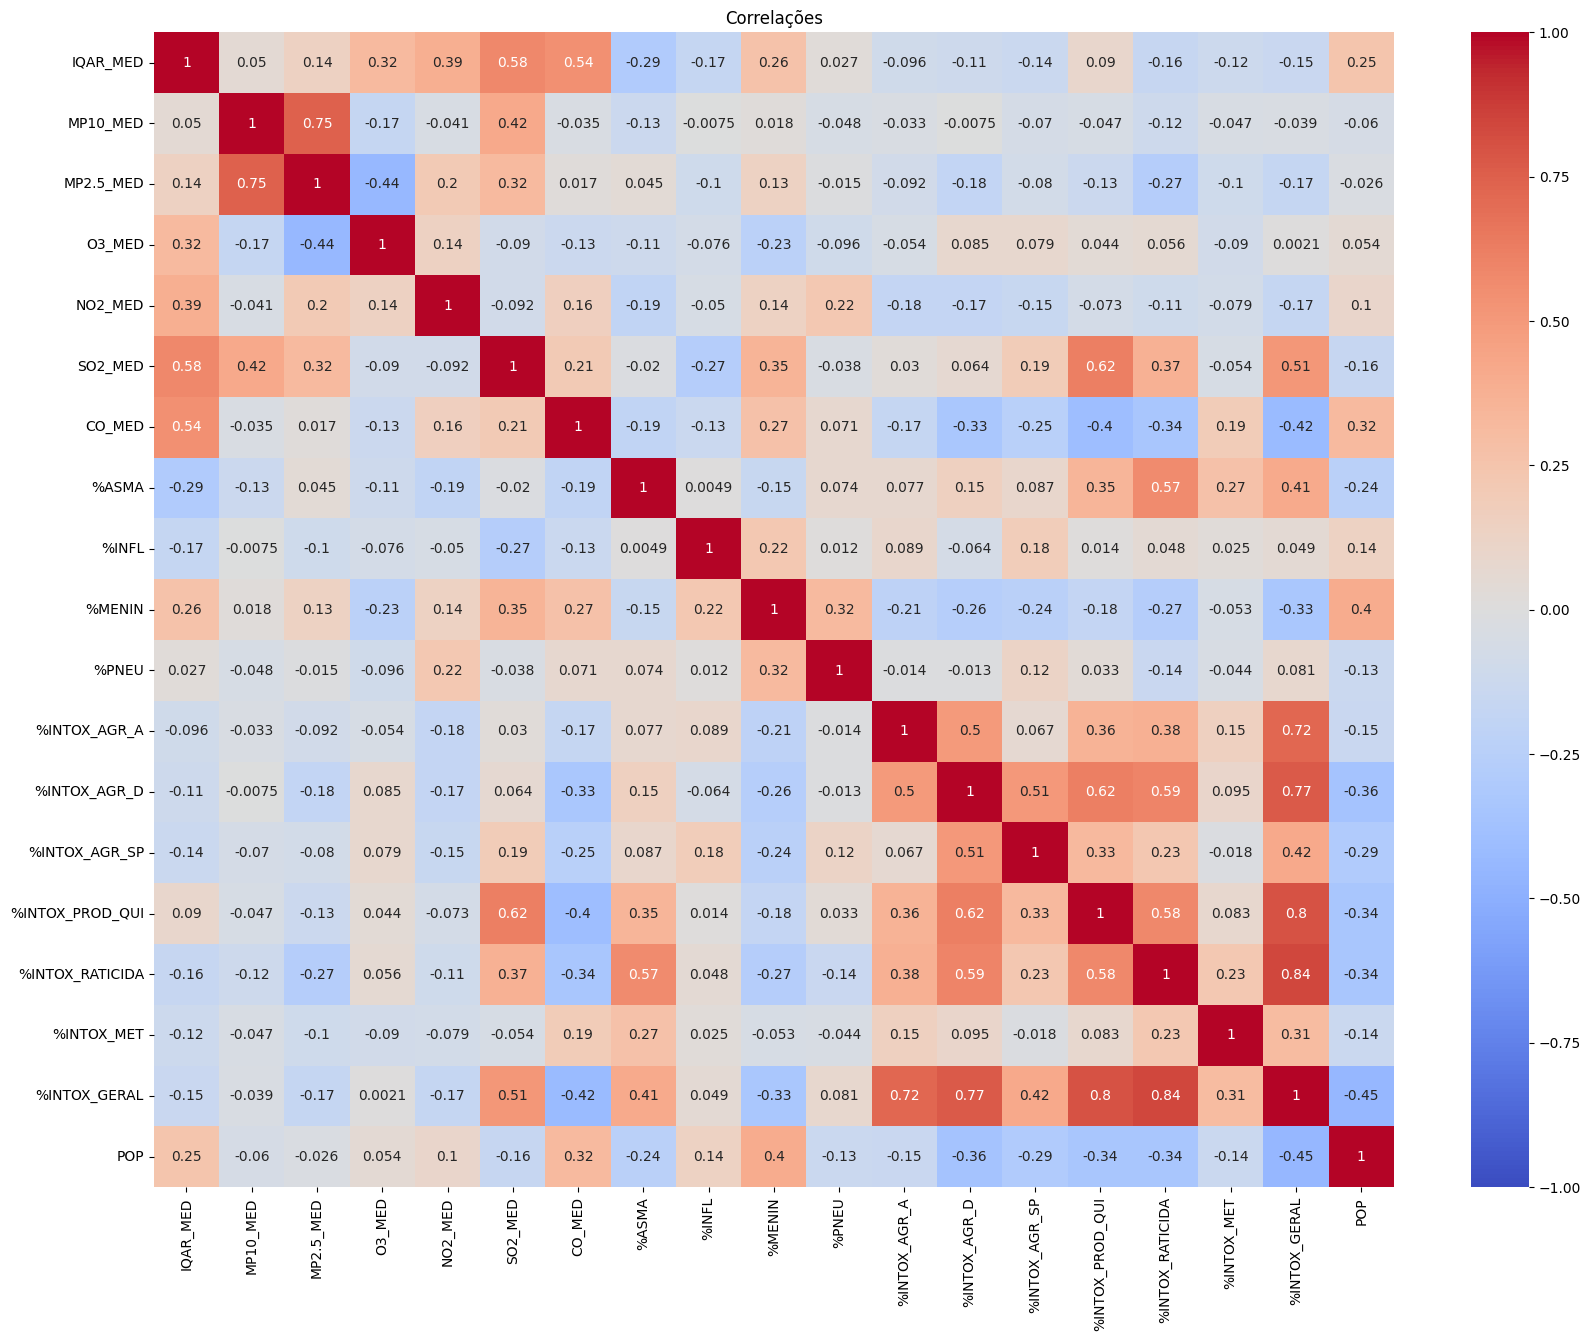

In [37]:
analise = tabela_de_analise[['IQAR_MED','MP10_MED','MP2.5_MED','O3_MED','NO2_MED','SO2_MED','CO_MED',
                             '%ASMA','%INFL','%MENIN','%PNEU',
                             '%INTOX_AGR_A','%INTOX_AGR_D','%INTOX_AGR_SP','%INTOX_PROD_QUI','%INTOX_RATICIDA','%INTOX_MET','%INTOX_GERAL',
                             'POP'
                             ]]


matriz_correlacao = analise.select_dtypes(include='number').corr()
plt.figure(figsize=(20, 15))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlações')
plt.show()
